<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[6차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ ROI (Region of Image)를 자르고 표시하는 방법에 대해 학습한다.<br>
○ 한글을 출력하는 방법에 대해 학습한다.<br>
○ 비트 연산 및 크로마 키(Chroma key) 합성으로 이미지를 합성하는 방법을 학습한다.

</font></td></tr>   
</table>

# 픽셀/블록 기반 이미지 처리

## ROI (Region of Image) 자르기

- ROI (Region of Image) 
   - 관심영역 - 이미지에 우리가 필요한 부분 (얼굴, 눈 ...)
   
<img src="./lecture_image/06_roi.png" width=30%>  


- <font color=red>img[200:370, 200:350]</font>

<img src="./lecture_image/06_roi2.png" width=60%>  


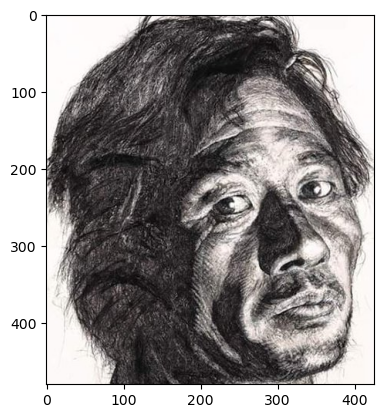

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/hwang2.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.imshow(img[30:510, 85:510])

## ROI에 도형 그리기

- <font color=red>cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께)</font> : 직선 그리기

<img src="./lecture_image/06_line.png" width=40%>  

(-0.5, 639.5, 781.5, -0.5)

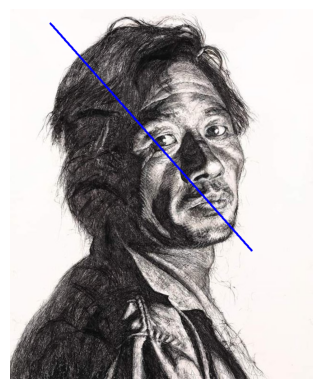

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/hwang2.jpg', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.line(img, (85, 30), (510, 510), (0, 0, 255), 3)

plt.imshow(img)
plt.axis('off')

- <font color=red>cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께)</font> : 원 그리기

<img src="./lecture_image/06_circle.png" width=20%>  

(-0.5, 639.5, 781.5, -0.5)

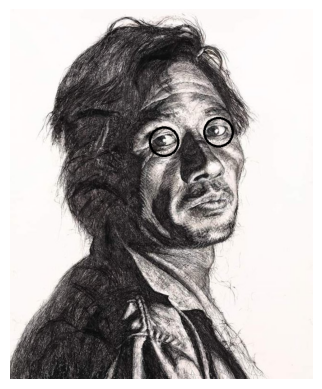

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/hwang2.jpg', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.circle(img, (325, 280), 30, (0, 0, 0), 3)
img = cv2.circle(img, (440, 260), 30, (0, 0, 0), 3)

plt.imshow(img)
plt.axis('off')

- <font color=red>cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께)</font> : 사각형 그리기

<img src="./lecture_image/06_rectangle.png" width=30%>  

(-0.5, 639.5, 781.5, -0.5)

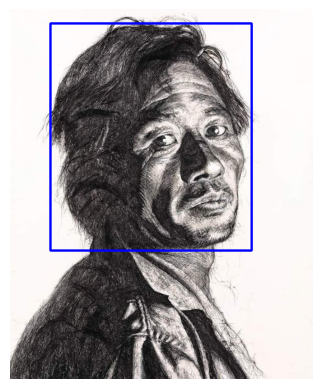

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/hwang2.jpg', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.rectangle(img, (85, 30), (510, 510), (0, 0, 255), 3)

plt.imshow(img)
plt.axis('off')

- <font color=red>cv2.ellipse(배경이미지, 중심좌표, 장축/단축 반지름, 기울기, 호의시작각, 호의 종료각, 색상, 선두께)</font> : 타원 그리기

<img src="./lecture_image/06_ellipse.png" width=30%>  

(-0.5, 639.5, 781.5, -0.5)

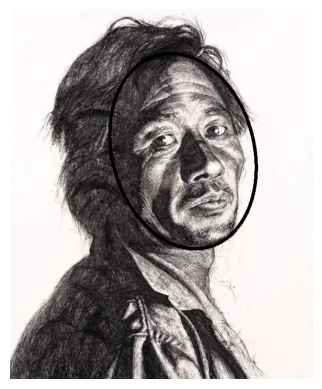

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/hwang2.jpg', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.ellipse(img, (365, 300), (150, 210), -15, 0, 360, (0, 0, 0), 5)

plt.imshow(img)
plt.axis('off')

- <font color=red>cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 굵기)</font> : 텍스트 그리기

<img src="./lecture_image/06_text.png" width=30%>  

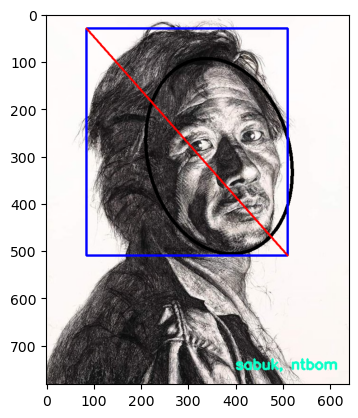

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/hwang2.jpg', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.ellipse(img, (365, 300), (150, 210), -15, 0, 360, (0, 0, 0), 5)
img = cv2.rectangle(img, (85, 30), (510, 510), (0, 0, 255), 3)
img = cv2.line(img, (85, 30), (510, 510), (255, 0, 0), 3)


img = cv2.putText(img, 'sabuk, ntbom', (400, 750), cv2.FONT_HERSHEY_SIMPLEX, 1, (10, 255, 200), 3)

plt.imshow(img)

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 이미지에 ROI 영역을 표시하고 이름을 출력해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/06_ryan.png" width=20%></td></tr>   
</table>

## 한글 출력하기

- c:/Windows/Fonts 폴더에서 사용할 폰트를 현재 폴더에 fonts 폴더를 생성하고 복사한다


- <font color=red>font = ImageFont.truetype("fonts/gulim.ttc", 30)</font> : 사용할 폰트와 크기를 가져온다

- <font color=red>img_pil = Image.fromarray(img)</font> : array 이미지를 PIL 이미지로 변환

- <font color=red>draw = ImageDraw.Draw(img_pil)</font> : PIL 이미지를 그림

- <font color=red>draw.text((200, 20), "레나 이미지", font=font, fill=(0, 0, 255, 0))</font> : 이미지에 텍스트를 그림

- <font color=red>img = np.array(img_pil)</font> : PIL 이미지를 numpy 배열로 변환

(-0.5, 639.5, 781.5, -0.5)

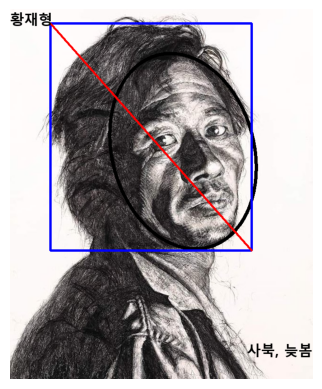

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageFont, ImageDraw, Image

img = cv2.imread('images/hwang2.jpg', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.ellipse(img, (365, 300), (150, 210), -15, 0, 360, (0, 0, 0), 5)
img = cv2.rectangle(img, (85, 30), (510, 510), (0, 0, 255), 3)
img = cv2.line(img, (85, 30), (510, 510), (255, 0, 0), 3)

# 한글 글꼴 가져오기 font
font = ImageFont.truetype('font/malgunbd.ttf', 30)

# numpy array를 파이썬 이미지 타입으로 변환
img_pil = Image.fromarray(img)

# 이미지를 내부 캔버스에 그린다
draw = ImageDraw.Draw(img_pil)

# 가져온 글꼴로 된 글을 캔버스에 쓴다
draw.text((500, 700), '사북, 늦봄', font=font, fill=(0, 0, 0, 0))
draw.text((0, 0), '황재형', font=font, fill=(0, 0, 0, 0))
# 파이썬 이미즈를 numpy array로 변환
img = np.array(img_pil)


# # 한글 글꼴 가져오기 font
# font = ImageFont.truetype('font/malgunbd.ttf', 20)

# # numpy array를 파이썬 이미지 타입으로 변환
# img_pil = Image.fromarray(img)

# # 이미지를 내부 캔버스에 그린다
# draw = ImageDraw.Draw(img_pil)

# # 가져온 글꼴로 된 글을 캔버스에 쓴다
# draw.text((0, 0), '황재형', font=font, fill=(0, 0, 0, 0))

# # 파이썬 이미즈를 numpy array로 변환
# img = np.array(img_pil)





plt.imshow(img)
plt.axis('off')

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 다른 폰트의 한글을 출력해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/06_ryan2.png" width=20%></td></tr>   
</table>

# 이미지 합성하기

## 비트 연산을 이용해서 합성하기

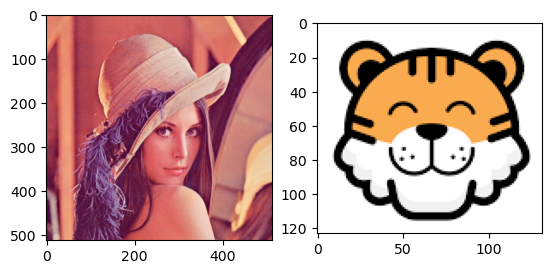

In [9]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('images/lenna.png', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('images/tiger.png', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(img1)

plt.subplot(1,2,2)
plt.imshow(img2)


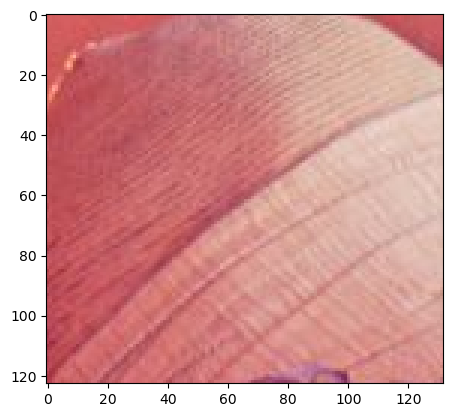

In [10]:
# 레나 이미지에 호랑이 이미지를 붙여보자
# 1 호랑이 이미지 크기 만큼 레나 이미지를 잘라보자

rows, cols, _ = img2.shape

roi = img1[50:50+rows, 150:150+cols]

plt.imshow(roi)

- <font color=red>cv2.bitwise_not(mask)</font>
  - mask는 흑백이미지여야 함
  - 0을 255로 255로 0으로 변환 (반전)

(-0.5, 131.5, 122.5, -0.5)

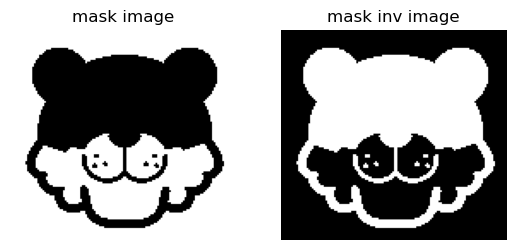

In [11]:
# 2 호랑이 이미지를 이진이미지로 변환한다
# 호랑이 이미지가 들어갈 곳을 마스크로 만든다?? 마스크가 뭔데

# 흑백으로
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# 이진으로 (0,1)
_, mask_b = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY)

# 마스크는 흰색이어야 한다(대체 왜!!!!) 지금은 검정색이니까 흰색으로 바꾸자
mask_b_inv = cv2.bitwise_not(mask_b)

plt.subplot(1, 2, 1)
plt.title('mask image')
plt.imshow(mask_b, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('mask inv image')
plt.imshow(mask_b_inv, cmap='gray')
plt.axis('off')

- <font color=red>cv2.bitwise_and(src1, src2, mask)></font> : mask의 값이 아닌 부분만 src1과 src2를 AND 연산
  - mask는 흑백이미지여야 함
  - mask 값이 0인 부분 (검정)은 연산되지 않고 검정색 부분 그대로 놓여짐

(-0.5, 131.5, 122.5, -0.5)

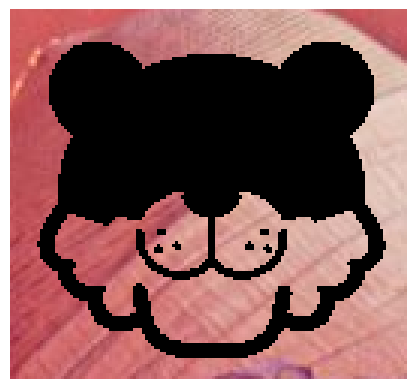

In [12]:
# 레나에서 자른 부분(ROI) 위치를 mask_b를 이용해서 표시
img_bg = cv2.bitwise_and(roi, roi, mask=mask_b)
plt.imshow(img_bg)
plt.axis('off')

(-0.5, 131.5, 122.5, -0.5)

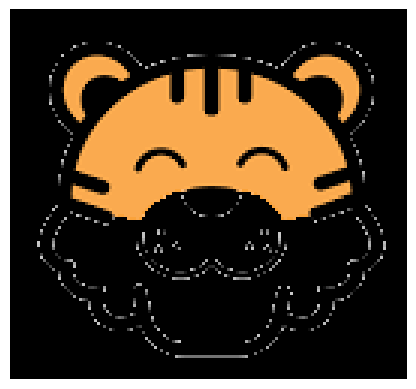

In [13]:
# 호랑이 이미지에서 붙일 부분만 표시
img_fg = cv2.bitwise_and(img2, img2, mask=mask_b_inv)
plt.imshow(img_fg)
plt.axis('off')

(-0.5, 131.5, 122.5, -0.5)

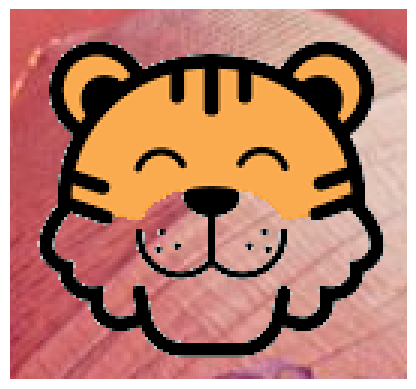

In [14]:
# 합성
bg_fg = cv2.add(img_bg, img_fg)
plt.imshow(bg_fg)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

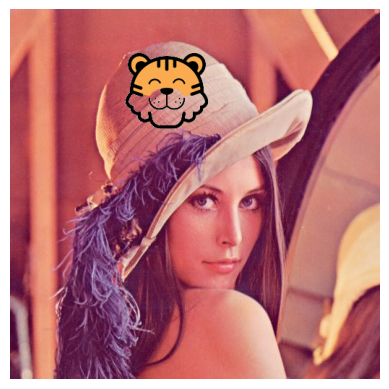

In [15]:
# 원본 이미지에 합성 이미지를 올린다
img1[50:50+rows, 150:150+cols] = bg_fg

plt.imshow(img1)
plt.axis('off')

<table border=1>
    <tr><td colspan=3 style="border: 1px solid black; width:600px; text-align: left;">
        <font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=2>○ 다음과 같이 2개의 이미지를 합성해보자.</font></td></tr> 
    <tr>
        <td style="border: 1px solid black;">
        <img src="./lecture_image/06_ryan_cap2.png" width=80%></td>        
    </tr>       
</table>

## 크로마 키(Chroma key) 합성

- 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술

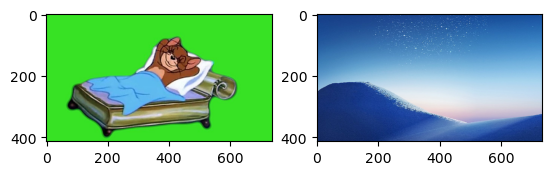

In [16]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('images/chromakey2.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('images/back2.png', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


plt.subplot(1,2,1)
plt.imshow(img1)

plt.subplot(1,2,2)
plt.imshow(img2)


(-0.5, 735.5, 413.5, -0.5)

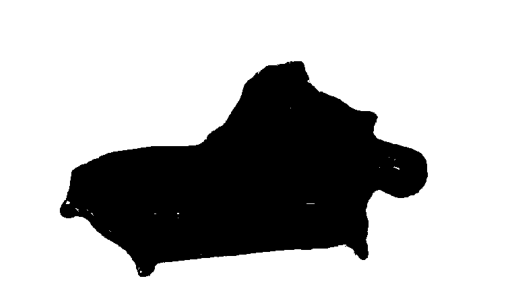

In [17]:
# 녹색추출
# HSV
# H : 색
# S : 채도
# V : 명도

# RGB를 HSV로 바꾸기
hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)

# 녹색 색상 범위를 결정 -> 녹색 부분 마스크
# (최소 색상값, 최소 채도값, 최소 명도값), (최대 색상값, 최대 채도값, 최대 명도값)
mask = cv2.inRange(hsv, (50, 150, 0), (79, 255, 255)) # 녹색은 50에서 70, 최대 채도명도는 255로 하는 게 좋다

plt.imshow(mask, cmap='gray')
plt.axis('off')

(-0.5, 735.5, 413.5, -0.5)

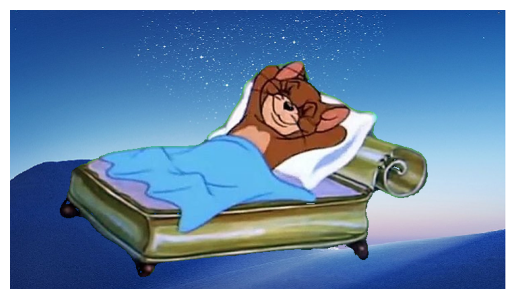

In [18]:
# 크로마키 합성

# img2에 mask와 img1을 합성해서 img1에 저장 저장
cv2.copyTo(img2, mask, img1)

plt.imshow(img1)
plt.axis('off')

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[6차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=2>
○ ROI (Region of Image) : 관심영역을 의미<br>
○ line() - 선그리기<br> 
○ circle() - 원 그리기<br> 
○ rectangle() - 사각형 그리기<br> 
○ ellipse() - 타원 그리기<br> 
○ putText() - 문자 출력<br>

○ bitwise_not() : 반전 연산<br>
○ bitwise_and() : AND 연산<br>
○ add() : 2개 이미지 합치기<br>

○ 크로마 키 합성 : 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술<br>

○ copyTo() : 녹색 영역에 다른 영역 배경을 합성하기            
        </font></td></tr>   
</table>